<a href="https://colab.research.google.com/github/shoqkhalidd/projectptt/blob/main/ProjectCS364_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Predict Cases of COVID-19 Using KNN Classifier**  

# 1-Importing libraries


We using pandas to manipulate data and matplotlib and seaborn for the data visualization

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive/')

# for plotting and visualozing data
import seaborn as sns

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# 2-Reading Data

In [ ]:
# import Dataset
balance_data = pd.read_csv('/content/drive/MyDrive/dataset(covid-19).csv')
balance_data

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# checking the shape of our dataset
balance_data.shape

(5644, 111)

We have 111 columns and 5644 rows in our dataset.

## 2.1-Data types

In [ ]:
balance_data.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
                                                          ...   
HCO3 (arterial blood gas analysis)                       float64
pO2 (arterial blood gas analysis)                        float64
Arteiral Fio2                                            float64
Phosphor                                                 float64
ctO2 (arterial blood gas analysis)                       float64
Length: 111, dtype: object

# 3-Cleaning Date

## 3.1-Dropping variables

The values in these columns would have no bearing on our analysis. To deal with this, we'll dpop the values from these columns from the dataset.

In [ ]:
balance_data = balance_data.drop(columns=['Patient ID','Patient addmited to regular ward (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to intensive care unit (1=yes, 0=no)'])
balance_data


,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,17,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,4,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,10,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3.2-Dealing with Missing Values

Checking for missing values.

In [ ]:
# looking for null values
total_null_values = balance_data.isnull().sum().sort_values(ascending=False) 
not_null_values = balance_data.notnull().sum().sort_values(ascending=False) 
null_values_percentage = (balance_data.isnull().sum()/balance_data.notnull().count().sort_values(ascending=False)) * 100

# concating the calculated values with the data frame of null values
dataset_missing_values = pd.concat({'Null': total_null_values, 'Not Null': not_null_values, 'Percentage': null_values_percentage}, axis=1)

# view the newly formed dataframe
dataset_missing_values

,Null,Not Null,Percentage
Mycoplasma pneumoniae,5644,0,100.000000
Partial thromboplastin time (PTT),5644,0,100.000000
"Prothrombin time (PT), Activity",5644,0,100.000000
D-Dimer,5644,0,100.000000
Urine - Sugar,5644,0,100.000000
...,...,...,...
Influenza A,4290,1354,76.009922
Influenza B,4290,1354,76.009922
Respiratory Syncytial Virus,4290,1354,76.009922
SARS-Cov-2 exam result,0,5644,0.000000


In [ ]:
# finding those columns that completely doesn't have any values
dataset_missing_values=dataset_missing_values[dataset_missing_values['Percentage'] >= 99]

In [ ]:
for i in dataset_missing_values.index:
  balance_data=balance_data.drop(columns = [i], axis=1) 

balance_data.head() 

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,...,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Creatine phosphokinase (CPK)
0,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Let's replace all our 'NaN' values with 0.

because our dataset have some colmuns with string values or null value, we have to be rpalce them to numric tybe to deal with it for the calclutions.

In [ ]:
# replace NaNs by 0
balance_data = balance_data.fillna(0)

## Let's replace all our affirmative/positive values to 1 and all negative values to 0

In [ ]:
balance_data.replace('not_detected', 0, inplace=True)
balance_data.replace('detected', 1, inplace=True)
balance_data.replace('absent', 0, inplace=True)
balance_data.replace('present', 1, inplace=True)
balance_data.replace('negative', 0, inplace=True)
balance_data.replace('positive', 1, inplace=True)

## The label of our dataset is "SARS-Cov-2 exam result" and we change it to "Target"

In [ ]:
#The column 'SARS-Cov-2 exam result' has been renamed to 'target'.
balance_data = balance_data.rename(columns={'SARS-Cov-2 exam result':'Target'})
balance_data.head()

,Patient age quantile,Target,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,...,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Creatine phosphokinase (CPK)
0,13,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0,0.0,0,0,0,0,0.0,0.0,0.0,0.0
1,17,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,...,0,0.0,0,0,0,0,0.0,0.0,0.0,0.0
2,8,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0,0.0,0,0,0,0,0.0,0.0,0.0,0.0
3,5,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0,0.0,0,0,0,0,0.0,0.0,0.0,0.0
4,15,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0,0.0,0,0,0,0,0.0,0.0,0.0,0.0


In [ ]:
balance_data['Target'].value_counts()

0    5086
1     558
Name: Target, dtype: int64

# 4-Data Analysis

## 4.1-Feature Selection

In [ ]:
# defining target variables 
target = balance_data['Target']

# defining predictor variables 
features = balance_data.select_dtypes(exclude=[object])
features = features.drop(columns = ['Patient age quantile','Target']) 

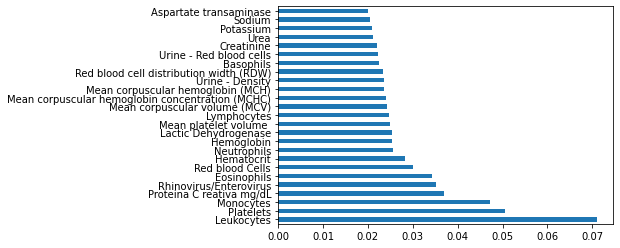

In [ ]:

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(features,target)
#use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [ ]:

features= features[feat_importances.nlargest(25).index]
# assigning the splitting of data into respective variables
features

,Leukocytes,Platelets,Monocytes,Proteina C reativa mg/dL,Rhinovirus/Enterovirus,Eosinophils,Red blood Cells,Hematocrit,Neutrophils,Hemoglobin,...,Mean corpuscular hemoglobin (MCH),Urine - Density,Red blood cell distribution width (RDW),Basophils,Urine - Red blood cells,Creatinine,Urea,Potassium,Sodium,Aspartate transaminase
0,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.094610,-0.517413,0.357547,-0.147895,1,1.482158,0.102004,0.236515,-0.619086,-0.022340,...,-0.292269,0.000000,-0.625073,-0.223767,0.000000,2.089928,1.198059,-0.305787,0.862512,0.000000
2,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,1,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5640,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5641,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5642,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.338525,0.000000,0.000000,-0.177169,0.000000,0.000000,0.000000,0.000000,0.000000


## Heatmap

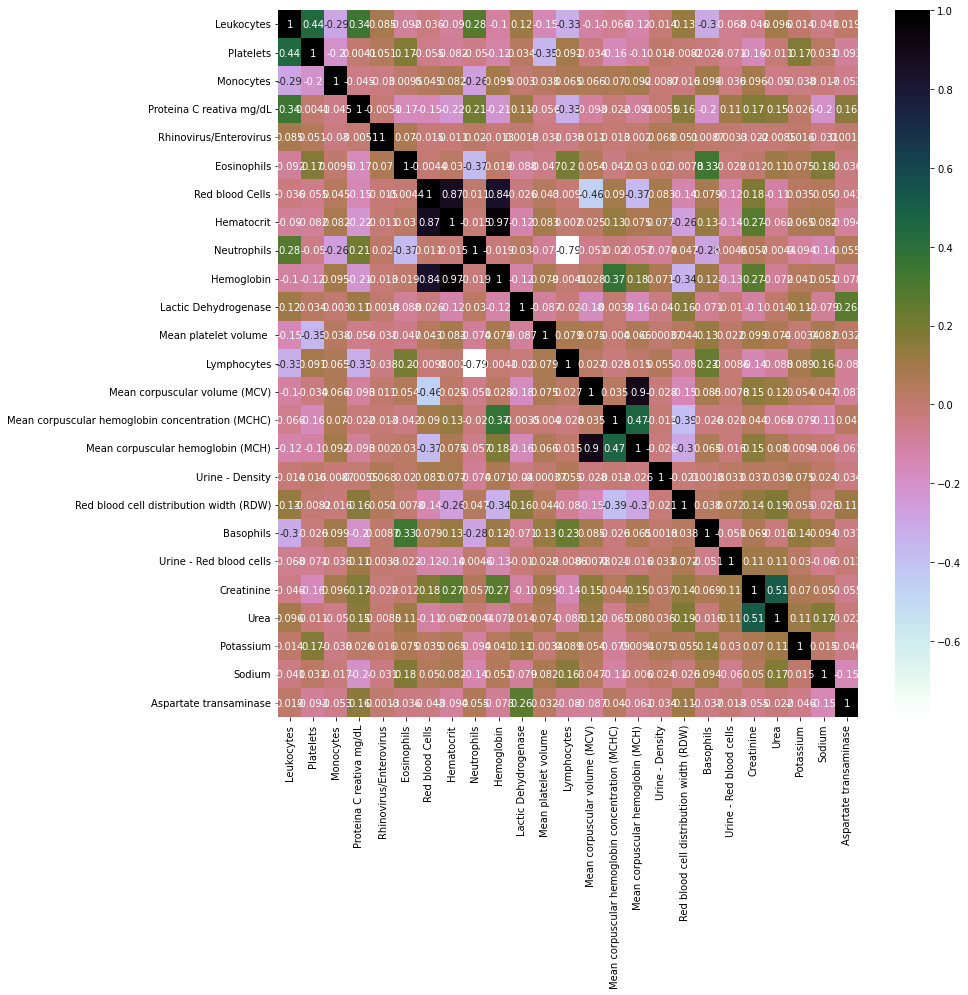

In [ ]:
import seaborn as sns
plt.figure(figsize=(13,13)) 
sns.heatmap(features.corr(),annot=True,cmap='cubehelix_r') 
plt.show()

## visualize the relationship between the features and the target using scatterplots

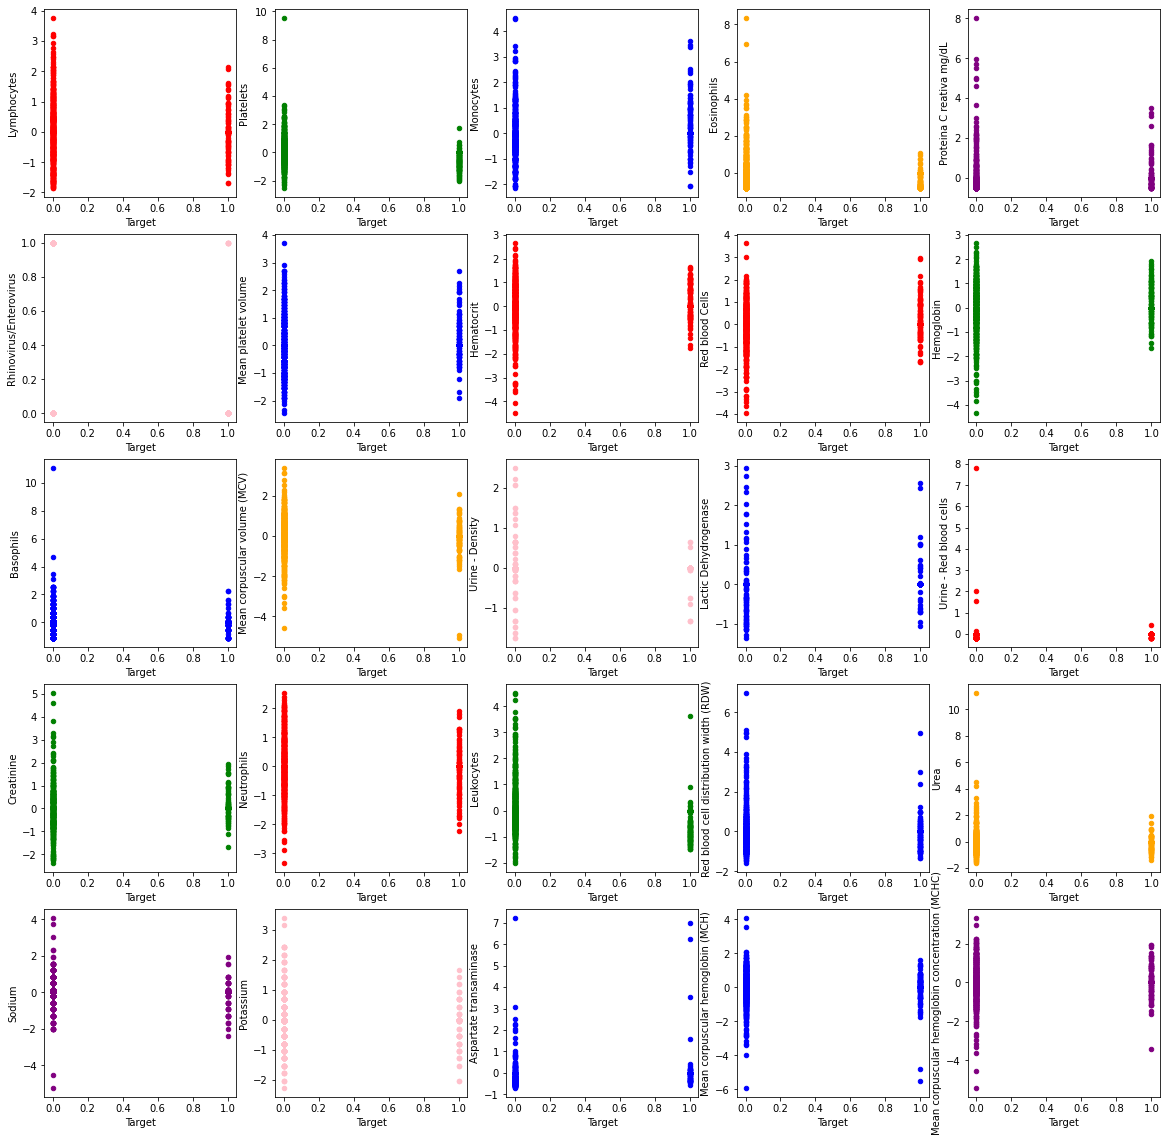

In [ ]:
fig, axs = plt.subplots(5,5 , figsize=(20, 20))
balance_data.plot(kind='scatter', x='Target', y='Lymphocytes',ax=axs[0,0], c='red')
balance_data.plot(kind='scatter',  x='Target', y='Platelets', ax=axs[0,1], c='green')
balance_data.plot(kind='scatter', x='Target', y='Monocytes',ax=axs[0,2], c='blue')
balance_data.plot(kind='scatter',  x='Target', y='Eosinophils', ax=axs[0,3], c='orange')
balance_data.plot(kind='scatter', x='Target', y='Proteina C reativa mg/dL',ax=axs[0,4], c='purple')
balance_data.plot(kind='scatter',  x='Target', y='Rhinovirus/Enterovirus', ax=axs[1,0], c='pink')
balance_data.plot(kind='scatter', x='Target', y='Mean platelet volume ',ax=axs[1,1], c='blue')
balance_data.plot(kind='scatter',  x='Target', y='Hematocrit', ax=axs[1,2], c='red')
balance_data.plot(kind='scatter', x='Target', y='Red blood Cells',ax=axs[1,3], c='red')
balance_data.plot(kind='scatter',  x='Target', y='Hemoglobin', ax=axs[1,4], c='green')
balance_data.plot(kind='scatter', x='Target', y='Basophils',ax=axs[2,0], c='blue')
balance_data.plot(kind='scatter',  x='Target', y='Mean corpuscular volume (MCV)', ax=axs[2,1], c='orange')
balance_data.plot(kind='scatter',  x='Target', y='Urine - Density', ax=axs[2,2], c='pink')
balance_data.plot(kind='scatter', x='Target', y='Lactic Dehydrogenase',ax=axs[2,3], c='blue')
balance_data.plot(kind='scatter',  x='Target', y='Urine - Red blood cells', ax=axs[2,4], c='red')
balance_data.plot(kind='scatter',  x='Target', y='Creatinine', ax=axs[3,0], c='green')



balance_data.plot(kind='scatter', x='Target', y='Neutrophils',ax=axs[3,1], c='red')
balance_data.plot(kind='scatter',  x='Target', y='Leukocytes', ax=axs[3,2], c='green')
balance_data.plot(kind='scatter', x='Target', y='Red blood cell distribution width (RDW)',ax=axs[3,3], c='blue')
balance_data.plot(kind='scatter',  x='Target', y='Urea', ax=axs[3,4], c='orange')
balance_data.plot(kind='scatter', x='Target', y='Sodium',ax=axs[4,0], c='purple')
balance_data.plot(kind='scatter',  x='Target', y='Potassium', ax=axs[4,1], c='pink')
balance_data.plot(kind='scatter', x='Target', y='Aspartate transaminase',ax=axs[4,2], c='blue')
balance_data.plot(kind='scatter', x='Target', y='Mean corpuscular hemoglobin (MCH)',ax=axs[4,3], c='blue')
balance_data.plot(kind='scatter', x='Target', y='Mean corpuscular hemoglobin concentration\xa0(MCHC)',ax=axs[4,4], c='purple')


## dropping the last three features above due to a weak relationship with the target

In [ ]:
#features = features.drop(columns = ['Respiratory Syncytial Virus','Influenza A','Influenza B'])
features = features.drop(columns = ['Rhinovirus/Enterovirus','Urine - Red blood cells'])  

In [ ]:
features

,Leukocytes,Platelets,Monocytes,Proteina C reativa mg/dL,Eosinophils,Red blood Cells,Hematocrit,Neutrophils,Hemoglobin,Lactic Dehydrogenase,...,Mean corpuscular hemoglobin concentration (MCHC),Mean corpuscular hemoglobin (MCH),Urine - Density,Red blood cell distribution width (RDW),Basophils,Creatinine,Urea,Potassium,Sodium,Aspartate transaminase
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.094610,-0.517413,0.357547,-0.147895,1.482158,0.102004,0.236515,-0.619086,-0.022340,0.000000,...,-0.950790,-0.292269,0.000000,-0.625073,-0.223767,2.089928,1.198059,-0.305787,0.862512,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5642,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.338525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#5-Building Model
## 5.1-Importing KNeighborsClassifie Library

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## 5.2-Instantiate the model

In [ ]:
# instantiating KNeighborsClassifier
knn = KNeighborsClassifier()

## 5.3-Finding the optimal K

Trying to find the optimal number of neighbors with the lowest Misclassification error

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(features, target, test_size=0.3, random_state=42)
#Performing cross validation
neighbors = []
cv_scores = []
from sklearn.model_selection import cross_val_score
#perform 10 fold cross validation
for k in range(1,10):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn,X_train,y_train,cv=10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 6 


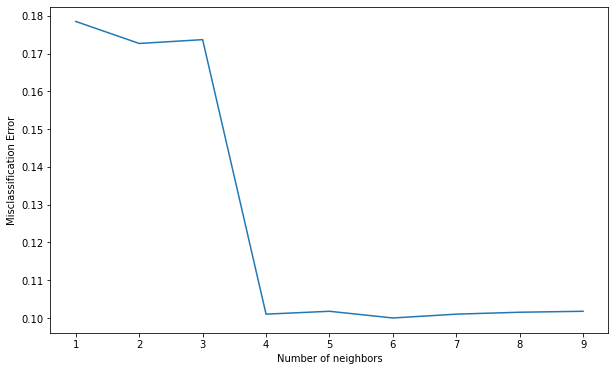

In [ ]:
#Misclassification error versus k
MSE = [1-x for x in cv_scores]

#determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is %d ' %optimal_k)

#plot misclassification error versus k

plt.figure(figsize = (10,6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()

# 7-Evaluation

## 7.1-Model Prediction

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = optimal_k)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
# predicting the values using the testing data set
y_pred = knn.predict(X_test)

## 7.2-Model Performance

In classification problems, accuracy is the commonly used metric to evaluate the performance of the model, which means the fraction of the correct predictions.

In [ ]:
# the score() method allows us to calculate the mean accuracy for the test data
print("The score accuracy for training data is: {}" .format(knn.score(X_train,y_train)))
print("The score accuracy for testing data is: {}" .format(knn.score(X_test,y_test)))

The score accuracy for training data is: 0.9025316455696203
The score accuracy for testing data is: 0.9067296340023613


#8-confusion matrix

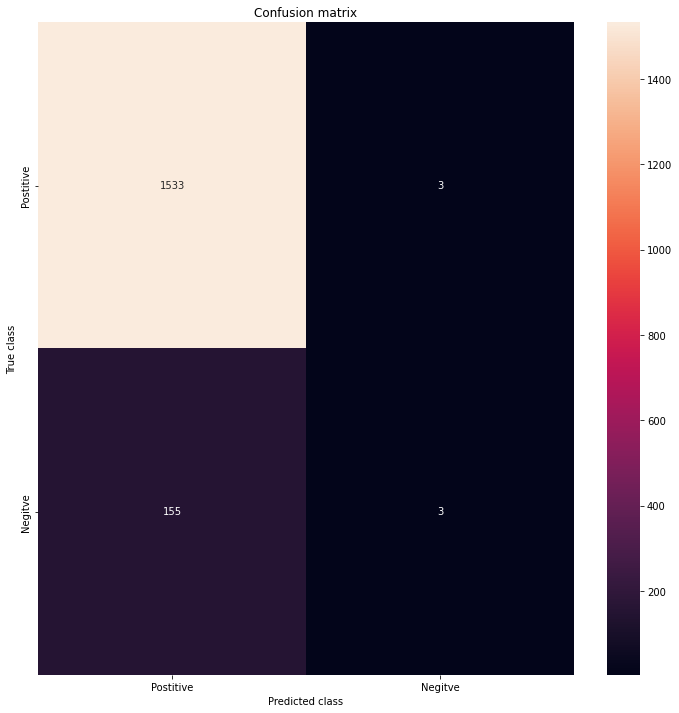

In [ ]:
from sklearn.metrics import confusion_matrix

Labels = ['Postitive','Negitve']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=Labels, yticklabels=Labels, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()